<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Boxplot: Median Value of Owner-Occupied Homes (MEDV)')

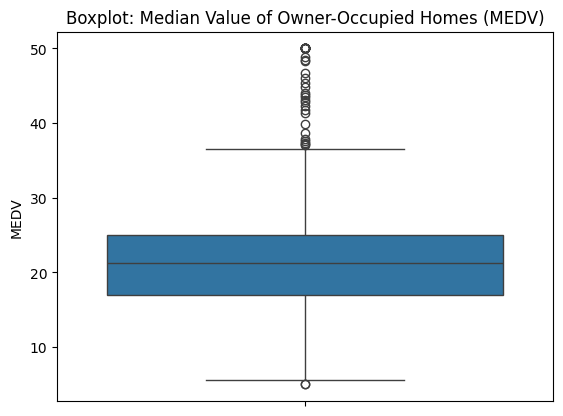

In [8]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(data = boston_df["MEDV"]) 
pyplot.title("Boxplot: Median Value of Owner-Occupied Homes (MEDV)")


Text(0.5, 1.0, 'Bar Graph for CHAS Variable')

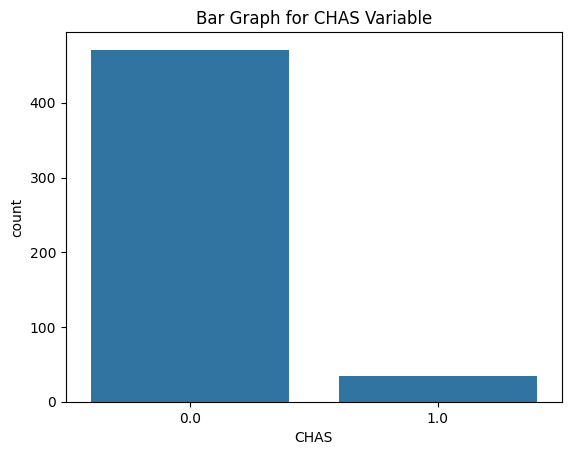

In [9]:
#Provide a  bar plot for the Charles river variable
sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Bar Graph for CHAS Variable")


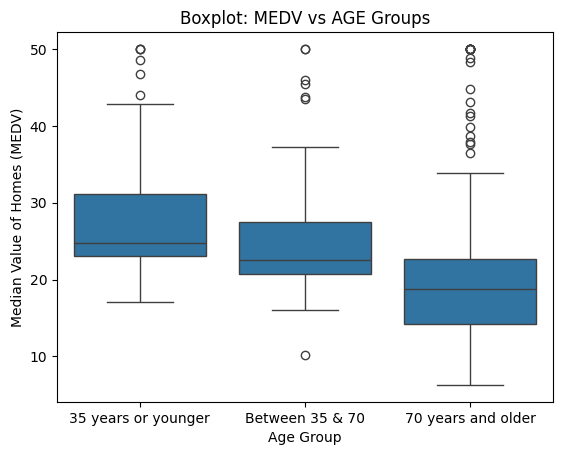

In [10]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
from scipy.stats import f_oneway

# Ensure AGE_GROUP is created
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=["35 years and younger", "35-70 years", "70 years and older"]
)

# Group data by AGE_GROUP using .loc
group_1 = boston_df.loc[boston_df["AGE_GROUP"] == "35 years and younger", "MEDV"]
group_2 = boston_df.loc[boston_df["AGE_GROUP"] == "35-70 years", "MEDV"]
group_3 = boston_df.loc[boston_df["AGE_GROUP"] == "70 years and older", "MEDV"]

# Perform ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values of houses among the age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values of houses among the age groups.")

sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df)
pyplot.title("Boxplot: MEDV vs AGE Groups")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value of Homes (MEDV)")
pyplot.show()

Text(0, 0.5, 'Non-Retail Business Acres (INDUS)')

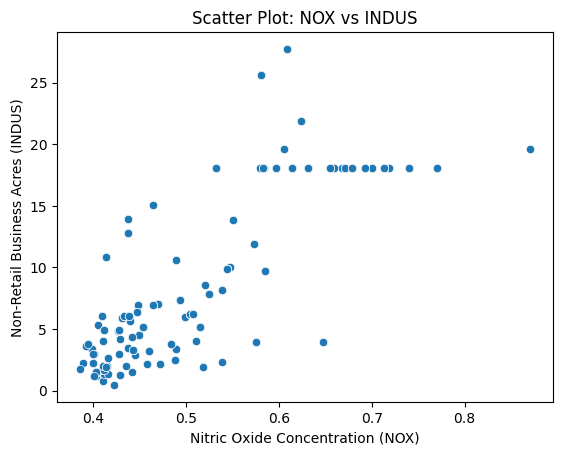

In [11]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Scatter Plot: NOX vs INDUS")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Non-Retail Business Acres (INDUS)")

Text(0.5, 0, 'PTRATIO')

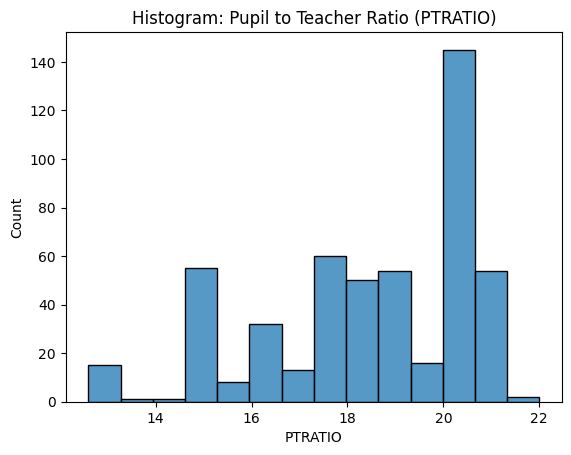

In [12]:
sns.histplot(boston_df["PTRATIO"])
pyplot.title("Histogram: Pupil to Teacher Ratio (PTRATIO)")
pyplot.xlabel("PTRATIO")

In [13]:
#1. Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)
from scipy.stats import ttest_ind

# Split the data based on CHAS
chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]

# Perform the t-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median value of houses bounded by the Charles River.")


T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.


In [15]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway

boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=["35 years and younger", "35-70 years", "70 years and older"]
)

# Group data by AGE_GROUP using .loc
group_1 = boston_df.loc[boston_df["AGE_GROUP"] == "35 years and younger", "MEDV"]
group_2 = boston_df.loc[boston_df["AGE_GROUP"] == "35-70 years", "MEDV"]
group_3 = boston_df.loc[boston_df["AGE_GROUP"] == "70 years and older", "MEDV"]

# Perform ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values of houses among the age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values of houses among the age groups.")


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median values of houses among the age groups.


In [16]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
from scipy.stats import pearsonr

# Perform Pearson correlation
correlation, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])

# Print results
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [19]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import statsmodels.api as sm

# Define the dependent and independent variables
X = boston_df["DIS"]
y = boston_df["MEDV"]

# Add a constant term for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

if model.pvalues.iloc[1] < 0.05:
    print("Reject the null hypothesis: Weighted distance to employment centers has a significant impact on median value of homes.")
else:
    print("Fail to reject the null hypothesis: Weighted distance to employment centers has no significant impact on median value of homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        00:28:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0